In [1]:
%pip install numpy matplotlib PyPDF2 openai



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install python-dotenv


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
import os
from dotenv import load_dotenv

load_dotenv()


True

In [58]:
import os
import re
import time

import openai

import numpy as np
import matplotlib.pyplot as plt

from PyPDF2 import PdfReader
from collections import Counter

# either declare your openai api key in env, or just copy paste it in here 

openai.api_key = os.getenv("OPENAI_APIKEY")
#openai.api_key = "..."


In [37]:

# Parse the PDF 

fname = "SkagerakEnergi_2022.pdf"

reader = PdfReader(fname)
page = reader.pages[2]


txt = page.extract_text(1)

parts = []
def visitor_body(text, cm, tm, fontDict, fontSize):
    """ Extract the text based on a set of properties """
    print(text)
    if float(fontSize) < 2:
        parts.append(text)

print(page.extract_text((0)))

def clean_text(text, remove_words=[]):
    
    text = text.replace('\n', ' ')  # Remove new lines
    for word in remove_words:
        text = text.replace(word, ' ')

    text = re.sub(' +', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip()  # Remove leading and trailing whitespaces
    return text



 Det har vært et spesielt år for oss i Skagerak Energi, 
og hele fornybarbransjen som vi er en del av. Strømprisene har 
gått i været, og det er ikke noe vi jubler for. Lav fyllingsgrad i 
vann magasinene er bare én av mange årsaker til dette.
 Det er fullt forståelig at komplekse årsaks  sammen­
henger skaper både uro og engasjement. Samtidig er det viktig 
at vi som jobber i bransjen blir enda flinkere til å forklare hvordan 
ting henger sammen og hva som kan fungere framover.
 I tillegg er det viktig å ikke miste målene av syne –
elektrifiseringen og dekarboniseringen vil fortsette – og vi trenger 
mer fornybar kraftproduksjon inn i systemet. Vi er fortsatt på 
lag med en grønn framtid, og er forberedt på et krafttak i årene 
som kommer.


In [39]:
# Store the text for each page

dirout = "./output"
if not os.path.exists(dirout):
    os.makedirs(dirout)

for idx, page in enumerate(reader.pages):
    parts = []
    page.extract_text(visitor_text=visitor_body)
    text_body = "".join(parts)
    txt = clean_text(text_body)
    with open(os.path.join(dirout, f"{idx:04}.txt"), "w") as f:
        f.write(txt)



Skagerak Energi

 Årsrapport 2022



Årsrapport

  



2022

Kraft



i et år med kriser






















 Det har vært et spesielt år for oss i Skagerak Energi, 



og hele fornybarbransjen som vi er en del av. Strømprisene har 



gått i været, og det er ikke noe vi jubler for. Lav fyllingsgrad i 



vann magasinene er bare én av mange årsaker til dette.



 Det er fullt forståelig at komplekse årsaks  sammen­



henger skaper både uro og engasjement. Samtidig er det viktig 



at vi som jobber i bransjen blir enda flinkere til å forklare hvordan 



ting henger sammen og hva som kan fungere framover.



 I tillegg er det viktig å ikke miste målene av syne –



elektrifiseringen og dekarboniseringen vil fortsette – og vi trenger 



mer fornybar kraftproduksjon inn i systemet. Vi er fortsatt på 



lag med en grønn framtid, og er forberedt på et krafttak i årene 



som kommer.

Innhold








02



Virksomheten



 26 Ledelsen



 28 Skagerak Kraft



 32 Lede



 38 Skagerak

In [40]:

files = os.listdir(dirout)

files.sort()
len_text = []
text_body = ""
for idx, f in enumerate(files):

    with open(os.path.join(dirout, f), "r") as f:
        text = f.read()

    len_text.append(len(text))

    text_body += text.replace("- ", "").replace("\n", "")




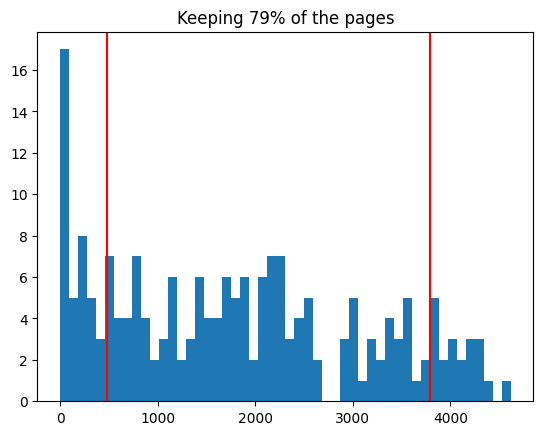

In [41]:
# Do some quick overview of the length of each page

plt.hist(len_text, bins=50)

remove_threashold = 0.20
plt.axvline(np.quantile(len_text, 0.9), color="r")
plt.axvline(np.quantile(len_text, remove_threashold), color="r")

len_text = np.array(len_text)
keeping = len(len_text[len_text > np.quantile(len_text, remove_threashold)])/len(len_text)
plt.title(f"Keeping {keeping*100:0.0f}% of the pages")
plt.show()



In [42]:
word_count = Counter([])


In [43]:

# Get the bag of words + a count of it

files = os.listdir(dirout)
files.sort()
len_text = []

for idx, f in enumerate(files):

    with open(os.path.join(dirout, f), "r") as f:
        text = f.read()
    
    len_text.append(len(text))

    word_count = word_count + Counter(text.split(" "))



print(word_count)


Counter({'og': 2008, 'i': 1437, 'av': 909, 'er': 891, 'for': 833, 'til': 742, '\xad': 682, 'som': 640, 'på': 612, '0': 609, 'Skagerak': 567, 'å': 537, 'med': 520, 'en': 482, 'har': 447, 'det': 395, 'Energi': 368, '2022': 335, '1': 322, 'fra': 258, 'at': 237, 'et': 224, 'de': 198, 'Årsrapport': 190, 'AS': 183, 'vi': 179, 'I': 160, '2': 149, 'millioner': 145, 'om': 142, 'ikke': 136, 'Det': 132, 'ble': 130, 'ved': 129, 'den': 126, 'skal': 126, '•': 123, 'kan': 112, '2021': 112, 'eller': 111, 'kroner': 109, '%': 105, '5': 104, 'Sum': 95, '2022Skagerak': 93, 'konsernet': 93, 'være': 92, 'vil': 91, 'beretning': 91, '6': 91, 'også': 90, 'var': 89, '3': 88, 'Andre': 88, 'etter': 85, 'selskap': 84, 'Vi': 83, 'men': 83, 'per': 82, 'andre': 80, '000': 79, 'over': 79, 'gjennom': 77, 'verdi': 77, '4': 76, 'Kraft': 72, '7': 72, 'gjeld': 71, 'Note': 70, 'år': 69, 'nye': 68, 'knyttet': 68, 'ut': 66, 'alle': 64, 'mot': 64, 'blir': 63, '9': 63, 'Lede': 59, 'seg': 59, '–': 58, '16': 58, 'mer': 57, 'Styre

In [44]:
# Create a remove_words list, if it exceed x chars
remove_words = []
for word in word_count.keys():
    if len(word) > 28:
        remove_words.append(word)

In [45]:
remove_words

['VrådalVrådalHaukeligrendHaukeligrendGeiloGeilo',
 'KristiansandKristiansandArendalArendalNotoddenNotoddenOsloOslo',
 'EgersundEgersundHaugesundHaugesundBergenBergen',
 'miljøavtrykk/miljøpåvirkning.Miljøarbeid',
 'resultaterBærekraftsmalbildet',
 'bunnlinjen.Onboarding/Offboarding',
 'Senioringeniør0102030405060708090',
 '.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.',
 '\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.',
 '\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.',
 '.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\xa0.\x

In [46]:

# You can now use it to extract a "cleaner version of the page data"

dirout = "./output"
if not os.path.exists(dirout):
    os.makedirs(dirout)

for idx, page in enumerate(reader.pages):
    parts = []
    page.extract_text(visitor_text=visitor_body)
    text_body = "".join(parts)
    txt = clean_text(text_body, remove_words=remove_words)
    with open(os.path.join(dirout, f"{idx:04}.txt"), "w") as f:
        f.write(txt)




Skagerak Energi

 Årsrapport 2022



Årsrapport

  



2022

Kraft



i et år med kriser






















 Det har vært et spesielt år for oss i Skagerak Energi, 



og hele fornybarbransjen som vi er en del av. Strømprisene har 



gått i været, og det er ikke noe vi jubler for. Lav fyllingsgrad i 



vann magasinene er bare én av mange årsaker til dette.



 Det er fullt forståelig at komplekse årsaks  sammen­



henger skaper både uro og engasjement. Samtidig er det viktig 



at vi som jobber i bransjen blir enda flinkere til å forklare hvordan 



ting henger sammen og hva som kan fungere framover.



 I tillegg er det viktig å ikke miste målene av syne –



elektrifiseringen og dekarboniseringen vil fortsette – og vi trenger 



mer fornybar kraftproduksjon inn i systemet. Vi er fortsatt på 



lag med en grønn framtid, og er forberedt på et krafttak i årene 



som kommer.

Innhold








02



Virksomheten



 26 Ledelsen



 28 Skagerak Kraft



 32 Lede



 38 Skagerak

In [51]:

files = os.listdir(dirout)

direout_llm = "./output_llm"

if not os.path.exists(direout_llm):
    os.makedirs(direout_llm)


files.sort()
len_text = []
for idx, f in enumerate(files):

    if os.path.exists(f"./output_llm/{idx:04}.txt"):
        print(f"Exists {idx}")
        continue

    with open(os.path.join(dirout, f), "r") as f:
        text = f.read()
    if len(text) < 100 or len(text) > 3700:
        print("skipping page!")
        continue

    prompt = """Summerize the following text: {text}"""
    formatted_promt = prompt.format(text=text)
    completion = openai.ChatCompletion.create(model="gpt-3.5-turbo", 
                                            messages=[
                                                {"role": "system", 
                                                "content": "You are a bot that summerize a page, identify the key points and export it in bullet points. Do not focus on figures and tables."},
                                                {"role": "user", "content": formatted_promt}])



    output_txt = completion.choices[0].message.content

    with open(os.path.join(direout_llm, f"{idx:04}.txt"), "w") as f:
        f.write(output_txt)

    
    # To avoid overload to the openAI api endpoint
    time.sleep(10)

skipping page!
skipping page!
Exists 2
Exists 3
Exists 4
Exists 5
Exists 6
Exists 7
skipping page!
skipping page!
Exists 10
Exists 11
Exists 12
skipping page!
Exists 14
skipping page!
skipping page!
Exists 17
Exists 18
Exists 19
Exists 20
Exists 21
Exists 22
Exists 23
Exists 24
Exists 25
Exists 26
Exists 27
Exists 28
Exists 29
skipping page!
Exists 31
Exists 32
Exists 33
skipping page!
skipping page!
Exists 36
Exists 37
Exists 38
Exists 39
skipping page!
Exists 41
Exists 42
Exists 43
skipping page!
Exists 45
Exists 46
Exists 47
Exists 48
Exists 49
Exists 50
Exists 51
Exists 52
Exists 53
Exists 54
skipping page!
Exists 56
skipping page!
Exists 58
Exists 59
Exists 60
Exists 61
Exists 62
Exists 63
Exists 64
Exists 65
Exists 66
skipping page!
skipping page!
Exists 69
Exists 70
Exists 71
skipping page!
Exists 73
Exists 74
Exists 75
Exists 76
Exists 77
Exists 78
skipping page!
Exists 80
Exists 81
Exists 82
Exists 83
Exists 84
skipping page!
Exists 86
Exists 87
Exists 88
Exists 89
Exists 90
E

In [57]:
text_app = ""
files = os.listdir(direout_llm)
for idx, f in enumerate(files):

    with open(os.path.join(direout_llm, f), "r") as f:
            text = f.read()
    if len(text) < 200 or len(text) > 3000:
        continue

    text_app += text.replace("- ", "").replace("\n", "")


with open(f"output_app.txt", "w") as f:
    f.write(text_app)


In [91]:
direout_llm = "./output_llm"
dirout = "./output"

files = os.listdir(direout_llm)

files.sort()
len_text = []
text_first = ""
text_second = ""
for idx, f in enumerate(files):
    with open(os.path.join(dirout, f), "r") as ft:
        text = ft.read()


    with open(os.path.join(direout_llm, f), "r") as f:
        text = f.read()

        if len(text) < 200 or len(text) > 3000:
            continue

        if text.startswith("Unfortunately, the provided text is not in a readable format"):
            continue

    text = clean_text(text)
    
    if idx < len(files)/2:
        text_first += text.replace("- ", "").replace("\n", "")
    elif idx < len(files)*0.9:
        text_second += text.replace("- ", "").replace("\n", "")
   

In [92]:
len(text_first)
len(text_second)

58238

In [94]:
text_second

'Beredskapsmøter har økt i hyppighet Fokus på å være våkne og forberedt NVE har advart energibransjen mot "spoofing" eller mobilkapring Spoofing involverer svindlere som maskeerer nummeret de ringer fra Målet er å lure virksomheter til å gi ut informasjon de vanligvis ikke ville ha gitt ut Skagerak Energi Årsrapport 2022 omtaler disse hendelsene (uten detaljer)Historically high electricity prices in 2022 Nearly 75% of value creation goes to the government as owners, tax collectors, and host municipalities Skagerak Energi has both direct and indirect public ownership Skatt (taxes) and avgifter (fees) amounted to 4.7 billion NOK in 2022 Dividends were 1.139 billion NOK, and retained surplus was 1.128 billion NOK Public entities retain 94% of the value creation, amounting to 7.156 billion NOK Skien, Porsgrunn, and Bamble will receive approximately 380 million NOK in dividends Local economy benefited from approximately 880 million NOK in demand for goods and services Skagerak Energi suppor

In [ ]:
prompt = """Summerize the following key points and list one point on pollution: {text}"""

formatted_promt = prompt.format(text=text_first)
completion = openai.ChatCompletion.create(model= "gpt-3.5-turbo-16k", 
                                        messages=[
                                            {"role": "system", 
                                            #"content": "You are a bot that that identify key financial key metrics of the company and how the outlook is for the company in terms of finance. Do not write any generic information about Lede."},

                                            "content": "You are a bot that that identify positive, negative and challenges areas and presents the result with bullet points and emojis for each category. Include emojies for every bullet point."},
                                            {"role": "user", "content": formatted_promt}])

output_txt = completion.choices[0].message.content

with open(f"output_summery_part_1.txt", "w") as f:
    f.write(output_txt)



In [95]:
prompt = """Summerize the following key points and list one point on pollution: {text}"""

formatted_promt = prompt.format(text=text_second)
completion = openai.ChatCompletion.create(model= "gpt-3.5-turbo-16k", # 
                                        messages=[
                                            {"role": "system", 
                                            #"content": "You are a bot that that identify key financial key metrics of the company and how the outlook is for the company in terms of finance. Do not write any generic information about Lede."},

                                            "content": "You are a bot that that identify positive, negative and challenges areas and presents the result with bullet points and emojis for each category. Include emojies for every bullet point."},
                                            {"role": "user", "content": formatted_promt}])

output_txt = completion.choices[0].message.content

with open(f"output_summery_part_2.txt", "w") as f:
    f.write(output_txt)


In [100]:

len_text = []
text_total = ""

with open("output_summery_part_2.txt", "r") as f:
    text1 = f.read()


with open("output_summery_part_1.txt", "r") as f:
    text2 = f.read()


text_total += text1.replace("- ", "").replace("\n", "")
text_total += text2.replace("- ", "").replace("\n", "")


ValueError: I/O operation on closed file.

In [98]:
prompt = """Summerize the following key points: {text}"""

formatted_promt = prompt.format(text=text_total)
completion = openai.ChatCompletion.create(model= "gpt-3.5-turbo-16k", # 
                                        messages=[
                                            {"role": "system", 
                                            #"content": "You are a bot that that identify key financial key metrics of the company and how the outlook is for the company in terms of finance. Do not write any generic information about Lede."},

                                            "content": "You are a bot that that identify positive, negative and challenges areas and presents the result with bullet points and emojis for each category. Include emojies for every bullet point."},
                                            {"role": "user", "content": formatted_promt}])

output_txt = completion.choices[0].message.content

with open(f"output_summery_total.txt", "w") as f:
    f.write(output_txt)


NameError: name 'text_total' is not defined